# Predicting Usage of a Video Game Research Server: Can experience level predict the total amount of behavioural data contributed to the dataset?
#### Rohan Patel
I aim to answer the broader question, or **Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.**

Using Question 2 as a guide, I'd like to find out: **Can experience level predict the total amount of behavioural data contributed to the dataset?**

In [1]:
#importing neccessary libraries for future analysis
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Dataset Description and Loading Data

I will use two datasets the PLAI provides: players.csv, which describes all unique players and relevant data, and sessions.csv, which represents individual play sessions and relevant data.

In [2]:
#reading in the data through GitHub
players <- read_csv("https://raw.githubusercontent.com/rdpatel04/datascienceproject/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/rdpatel04/datascienceproject/main/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


The **players** data set contains **195 observations**. The variables include:
1. **Experience** = Skill Level
2. **Subscribe**= Subscription status to the newsletter
3. **hashedEmail** = Player Email (encrypted)
4. **played_hours** = total time spent on server
5. **name** = Player's name
6. **gender** = Player's gender
7. **age** = Player's age

The **players** dataset has several issues, including potential duplicate players within the dataset and heavy outliers (underactive vs. overactive players). Minecraft keeners may also have duplicate accounts and others sharing accounts, leading to fragmented data. Also, given the geography, it is likely that the player base is not representative of the broader population.

Similarly, the **session** data set contains **1535 observations** describing the habits of the 195 players, including **5** variables: 
1. **hashedEmail** = hidden email of player
2. **start_time** = MM/DD/YYYY and start time of session
3. **end_time** MM/DD/YYYY and end time of session
4. **original_start_time** = numeric time stamp of when player started
5. **original_end_time** = numeric time stamp of when player ended

The **session** data set also contains issues, including formatting errors for the start_time and end_time variables, which will require heavy conversion as they are stored as strings and are not tidy. Session length may also vary; users may be inactive and leave their computers on, and others may log in accidentally.


## Summary of players dataset
The following dataset shows the mean of each of the numerical variables from the players.csv dataset in table format. 

In [3]:
players_summary <- players |>
    group_by(experience) |> 
    summarize(count = n(), mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE))
players_summary

experience,count,mean_played_hours,mean_age
<chr>,<int>,<dbl>,<dbl>
Amateur,63,6.0174603,20.25397
Beginner,35,1.2485714,21.65714
Pro,14,2.6000000,16.92308
Regular,36,18.2083333,20.60000
Veteran,48,0.6479167,20.95833


## Exploratory Data Analysis and Visualization
I merged the two data sets, and **hashedEmail** is used as the key. After the merge, I changed "Age" to "age" for a consistent naming convention. After that, I transformed the data by selecting the relevant columns and keeping only the necessary ones. I also converted the **experience** variable to factor form to treat the categorical data correctly. 

In [28]:
#combining the two datasets
players_sessions_combined <- merge(players, sessions, by = "hashedEmail", all = TRUE)

players_sessions_combined <- players_sessions_combined |>
  rename(age = Age)

#selecting relevant columns for future analysis
players_sessions_cleaned <- players_sessions_combined |>
    mutate(experience = as.factor(experience), na.rm = TRUE) |>
    select(experience, age, played_hours)
players_sessions_cleaned

experience,age,played_hours
<fct>,<dbl>,<dbl>
Regular,20,1.5
Regular,20,1.5
Veteran,17,0.0
Pro,21,0.4
Beginner,17,0.1
Regular,17,5.6
Regular,17,5.6
Regular,17,5.6
Regular,17,5.6


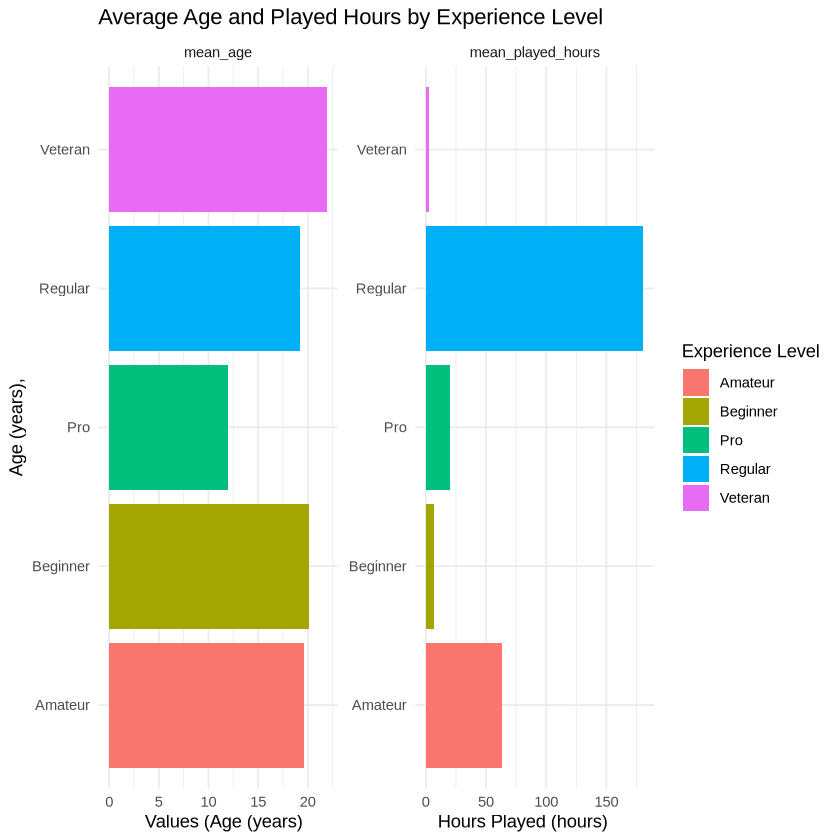

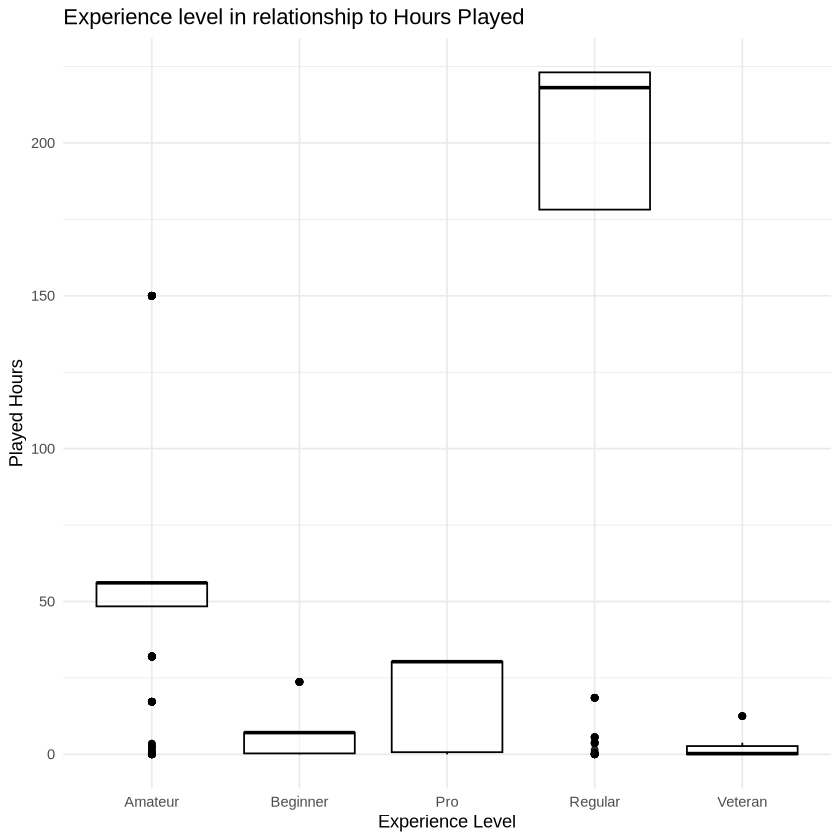

In [59]:
experience_summary <- players_sessions_cleaned |>
  group_by(experience) |>
  summarize(mean_age = mean(age, na.rm = TRUE),
            mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
  pivot_longer(cols = c(mean_age, mean_played_hours), 
               names_to = "Metric", values_to = "Value")

# Create bar chart
plot1 <- ggplot(experience_summary, aes(x = experience, y = Value, fill = experience)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ Metric, scales = "free") +
  labs(title = "Average Age and Played Hours by Experience Level", x = "Age (years),", y = "Values (Age (years)                           Hours Played (hours)", fill = "Experience Level") +
  theme_minimal() + coord_flip()

plot2 <- players_sessions_cleaned |>
    ggplot(aes(x = experience, y = played_hours)) +
    geom_boxplot(alpha = 0.5, color = "black") +  # Scatter points with transparency
    labs(title = "Experience level in relationship to Hours Played", x = "Experience Level", y = "Played Hours") +
    theme_minimal()

plot1
plot2

## Method and Plan

I will use multiple linear regression to analyze whether experience_level (categorical) and age (continuous) predict played_hours. Linear regression is a better choice than K-NN, as it will provide greater insight into the relationships between the variables, quantifying them instead of making predictions.

Some assumptions with the multiple linear regression include linearity, low correlation between predictors, and no duplicate observations within the data set. Outliers, which seem familiar, may also potentially affect the data. 

To evaluate the model's performance, I aim to split the data into respective training and testing sets, using an 80%/20% split. I will also implement k-fold cross-validation (5 fold) and evaluate the data across its residual as a metric. If any constraints are violated, I will swap models.

Some potential visualizations include a box plot to compare the distribution of the played_hours against experience level and a scatter plot to visualize any possible relationships.